# Основы визуализации данных с помощью matplotlib

## Урок 5. Визуализация категориальных данных

In [ ]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt

### Разбор практического задания

In [ ]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


([<matplotlib.axis.XTick at 0x12f237c46c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

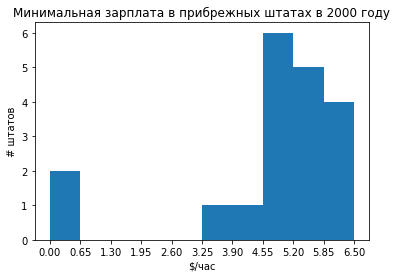

In [ ]:
serie = df[(df['Year'] == 2000) & (df['IsCoastal'] == 1)]['Salary']

plt.hist(serie)
plt.title("Минимальная зарплата в прибрежных штатах в 2000 году")
plt.xlabel('$/час')
plt.ylabel('# штатов')

bin_width = serie.max() / 10
x_range = [i*bin_width for i in range(11)]

plt.xticks(x_range)

Визуализация категориальных данных

In [ ]:
df1 = df[(df['Year'] == 2015)].groupby('IsCoastal')['Salary'].mean().sort_values(ascending=False).reset_index()
df1

,IsCoastal,Salary
0,1,7.760526
1,0,6.882778


In [ ]:
df1['IsCoastalStr'] = np.where(df1['IsCoastal'] == 1, 'Coastal', 'Not Coastal')
df1

,IsCoastal,Salary,IsCoastalStr
0,1,7.760526,Coastal
1,0,6.882778,Not Coastal


Text(0.5, 0, 'Тип штата')

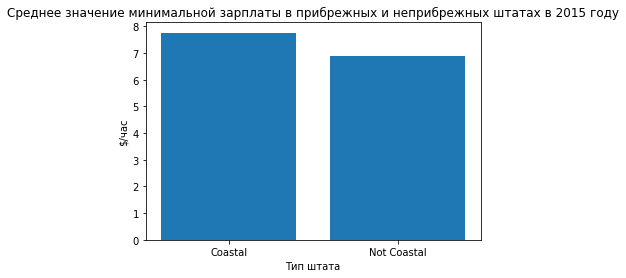

In [ ]:
plt.bar(df1['IsCoastalStr'], df1['Salary'])
plt.title("Среднее значение минимальной зарплаты в прибрежных и неприбрежных штатах в 2015 году")
plt.ylabel('$/час')
plt.xlabel('Тип штата')

Text(0, 0.5, '# штатов')

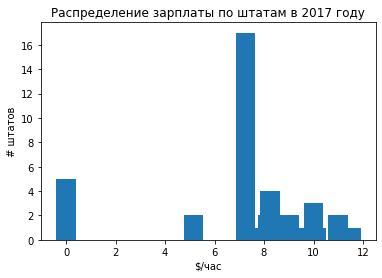

In [ ]:
df2 = df[df['Year'] == 2017].groupby('Salary')['State'].count().reset_index().sort_values('Salary')
plt.bar(df2['Salary'], df2['State'])
plt.title("Распределение зарплаты по штатам в 2017 году")
plt.xlabel('$/час')
plt.ylabel('# штатов')

([<matplotlib.axis.XTick at 0x12f26421d88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

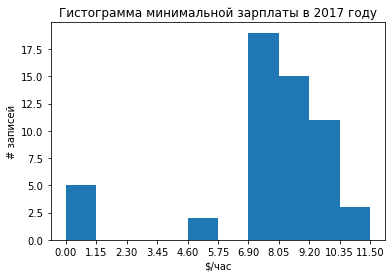

In [ ]:
serie = df[df['Year'] == 2017]['Salary']

plt.hist(series, bins=10)
plt.title("Гистограмма минимальной зарплаты в 2017 году")
plt.xlabel('$/час')
plt.ylabel('# записей')

bin_width = series.max() / 10
x_range = [i*bin_width for i in range(11)]
plt.xticks(x_range)

In [ ]:
df['IsCoastalStr'] = np.where(df['IsCoastal'] == 1, 'Coastal', 'Not Coastal')

serie3 = df[['State', 'IsCoastalStr']].drop_duplicates().groupby('IsCoastalStr')['State'].count()
serie3

IsCoastalStr
Coastal        19
Not Coastal    36
Name: State, dtype: int64

Text(0.5, 1.0, 'Соотношение количества прибрежных и неприбрежных штатов')

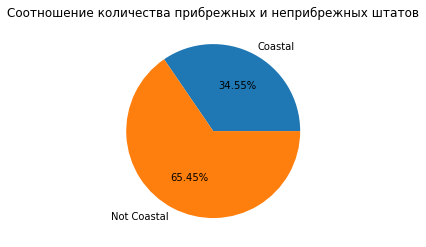

In [ ]:
plt.pie(serie3, labels=serie3.index, autopct='%1.2f%%')
plt.title("Соотношение количества прибрежных и неприбрежных штатов")